## Impact of the parameters: Jet opening angle

Here is studied a more realistic case:
* z=0.1
* source spectrum is generated assuming a powerlaw spectrum (between Emin=1MeV and Emax=100TeV)
* EGMF (turbulent magnetic field): 1E-15 Gauss, L_B= 1 Mpc
* EBL model: Dominguez

This part shows the impact on the halo effect if we play with the jet opening angle.

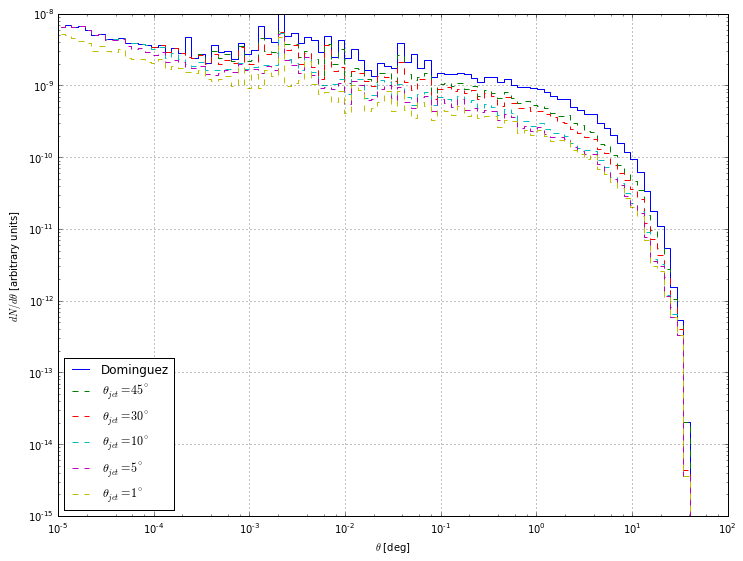

In [1]:
%matplotlib inline
import modules.arrival_angle

modules.arrival_angle.drawArrivalAngle(["Dominguez"],plot="jet opening")

In [3]:
from numpy import zeros, size, nditer, average, savetxt, set_printoptions
from modules.read import select_events
from modules.constants import degre

Redshifts=["0.04","0.14","1","2"]
opening_angle = [90,75,60,45,30,15,10,5,2,1,0.7,0.5,0.1,1e-2,1e-3] # degres 
powerlaw_index=1.2

def compute_theta_mean(i,j):
   if i==0:
      if j==0:
         theta_mean[i,j]=0
      else:
         theta_mean[i,j]=opening_angle[j-1]
   else:
      if j==0:
         theta_mean[i,j]=float(Redshifts[i-1])
      else:
         fileId="Simulations/z="+Redshifts[i-1]+"/EGMF=1e-15G"
         #fileId = "simple case - z="+Redshifts[i-1]
         weight, energy, time, theta_arrival, theta, phi, generation = select_events(fileId,Erange=[1,1e3],powerlaw_index=1.2,jet_opening=opening_angle[j-1])
         theta_mean[i,j]=average(theta_arrival,weights=weight)*degre
         print Redshifts[i-1], opening_angle[j-1], max(theta)*degre
   
theta_mean=zeros((size(Redshifts)+1,size(opening_angle)+1))
it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
   compute_theta_mean(it.multi_index[0],it.multi_index[1])
   it.iternext()
    
set_printoptions(precision=3)
print(theta_mean)

savetxt("Results/theta_mean_vs_jet_opening.dat",theta_mean,fmt='%1.4e')

0.04 90 0.053705514606
0.04 75 0.0485648487989
0.04 60 0.045344800624
0.04 45 0.0398179895702
0.04 30 0.0362450059473
0.04 15 0.0315330652076
0.04 10 0.0304299993745
0.04 5 0.0289299057653
0.04 2 0.0279796355379
0.04 1 0.0277137126051
0.04 0.7 0.0276261850934
0.04 0.5 0.0275576764881
0.04 0.1 0.0274274756022
0.04 0.01 0.027392968706
0.04 0.001 0.0273809917411
0.14 90 0.0541388128975
0.14 75 0.0498199827222
0.14 60 0.0453151565213
0.14 45 0.0409355244803
0.14 30 0.0364026421096
0.14 15 0.0319743219578
0.14 10 0.030438049992
0.14 5 0.0289206496248
0.14 2 0.0280185081929
0.14 1 0.0277167083298
0.14 0.7 0.0276236893409
0.14 0.5 0.0275628097451
0.14 0.1 0.0274408474533
0.14 0.01 0.0274161558742
0.14 0.001 0.0274102145431
1 90 0.0516720908476
1 75 0.0444798888357
1 60 0.0429343817888
1 45 0.0390854901493
1 30 0.0354327772049
1 15 0.031391259313
1 10 0.0301955399794
1 5 0.028839900124
1 2 0.0280054286081
1 1 0.0277000123654
1 0.7 0.027613414625
1 0.5 0.0275549673488
1 0.1 0.027422979606
1 0.0

[ 0.04  0.14  1.    2.  ]


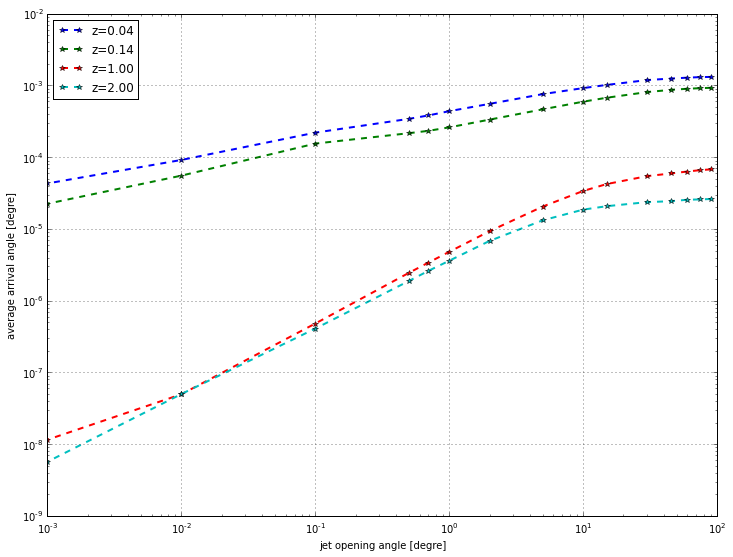

In [14]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import loadtxt

fig1 = figure(figsize=(12,9)) 
ax1 = fig1.add_subplot(111) 

theta_mean = loadtxt("Results/theta_mean_vs_jet_opening.dat")
Redshifts   = theta_mean[1:,0]
print Redshifts
i=1
for z in Redshifts:
    ax1.plot(theta_mean[0,1:],theta_mean[i,1:],'--*',linewidth=2,label="z=%.2f"%float(z))
    i+=1

ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.grid(b=True,which='major')
ax1.legend(loc="best")
ax1.set_xlabel("jet opening angle [degre]")
ax1.set_ylabel("average arrival angle [degre]")

show()

Halo effect is also depending on the source jet opening angle. Figure  shows
the photons mean arrival angle in the GeV band versus the jet opening angle of the source assuming
that the jet is oriented toward the observer at different redshifts. Size of the halo appears to
increase with the jet opening angle but also with the distance. Indeed the ratio of the halo size
between a collimated jet ($\approx 0.1^\circ$) and a isotropic source ($=90^\circ$) is 4 - 5 at 
z=0.1 and 2 at z=2. Thus the halo of a far source is less influenced by the jet than a close one.


### Impact du $\theta_{obs}$

* étude en considérant un jet d'ouverture $\alpha_{jet}=5^\circ$
* on jouera sur $\theta_{jet}$ angle par rapport à l'observateur

In [6]:
from numpy import zeros, size, nditer, average, savetxt, set_printoptions
from modules.read import ReadResults
from modules.constants import degre

Redshifts = ["0.0308","0.1","0.5","1","2"]
theta_jet = [0,2,5,10,15,30] # degres 
opening_angle = 5 # degres
powerlaw_index = 2

theta_mean=zeros((size(Redshifts)+1,size(theta_jet)+1))

it=nditer(theta_mean, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    i=it.multi_index[0]
    j=it.multi_index[1]
    if i==0:
        if j==0:
            theta_mean[i,j]=0
        else:
            theta_mean[i,j]=theta_jet[j-1]

    else:
        if j==0:
            theta_mean[i,j]=float(Redshifts[i-1])
            
        else:
            fileId="z="+Redshifts[i-1]+"-EGMF15-lambda_B=1Mpc-Dominguez-Emax=100TeV"
            weightini,E,pos1,pos2,theta,Esource = ReadResults("Simulations/"+fileId,cols=[1,2,4,6,8,9])
            weight_source = (Esource/min(Esource))**(1-powerlaw_index)
            weight = weightini* weight_source
            pos1=pos1*degre-theta_jet[j-1]
            pos2=pos2*degre-theta_jet[j-1]
            cond= (E<1e3) & (E>1e0) & (pos1<=opening_angle) & (pos2<=opening_angle)# GeV band
            theta_mean[i,j]=average(theta[cond],weights=weight[cond])*degre
    
    it.iternext()
    
set_printoptions(precision=3)
print(theta_mean)

savetxt("Results/theta_mean_vs_jet_direction.dat",theta_mean,fmt='%1.4e')

[[  0.000e+00   0.000e+00   2.000e+00   5.000e+00   1.000e+01   1.500e+01
    3.000e+01]
 [  3.080e-02   1.744e-01   1.976e-01   2.249e-01   2.578e-01   2.837e-01
    3.256e-01]
 [  1.000e-01   3.717e-01   4.262e-01   4.923e-01   5.739e-01   6.333e-01
    7.335e-01]
 [  5.000e-01   1.272e-01   1.476e-01   1.702e-01   1.975e-01   2.166e-01
    2.524e-01]
 [  1.000e+00   4.594e-02   5.193e-02   5.989e-02   6.815e-02   7.385e-02
    8.038e-02]
 [  2.000e+00   2.436e-02   2.706e-02   2.938e-02   3.104e-02   3.139e-02
    3.219e-02]]


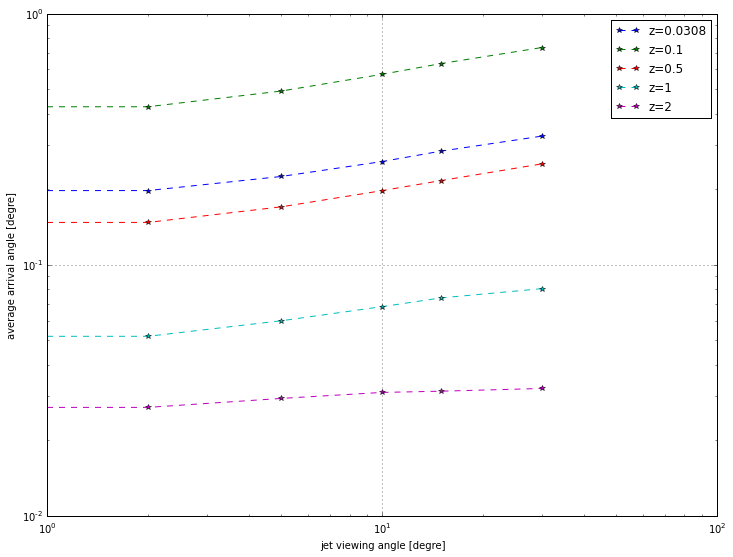

In [2]:
%matplotlib inline
from matplotlib.pyplot import figure, show
from numpy import loadtxt

fig1 = figure(figsize=(12,9)) 
ax1 = fig1.add_subplot(111) 

Redshifts=["0.0308","0.1","0.5","1","2"]
theta_mean = loadtxt("Results/theta_mean_vs_jet_direction.dat")
i=1
for z in Redshifts:
    ax1.plot(theta_mean[0,1:],theta_mean[i,1:],'--*',label="z="+z)
    i+=1

ax1.set_xscale('log')   
ax1.set_yscale('log')
ax1.grid(b=True,which='major')
ax1.legend(loc="best")
ax1.set_xlabel("jet viewing angle [degre]")
ax1.set_ylabel("average arrival angle [degre]")

show()

## Misaligned jet

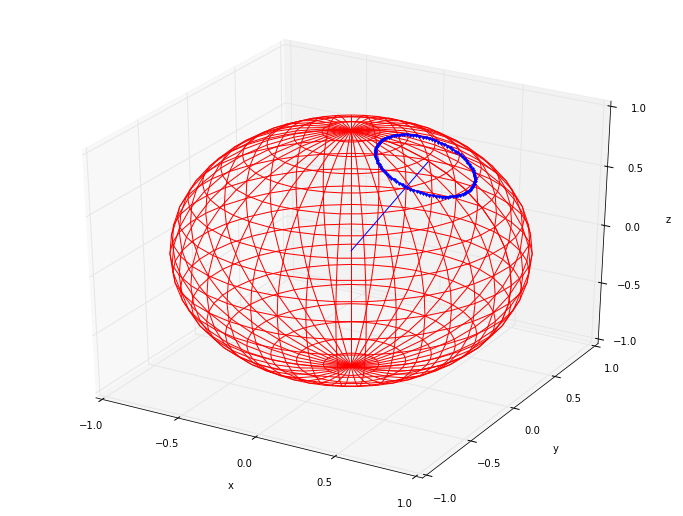

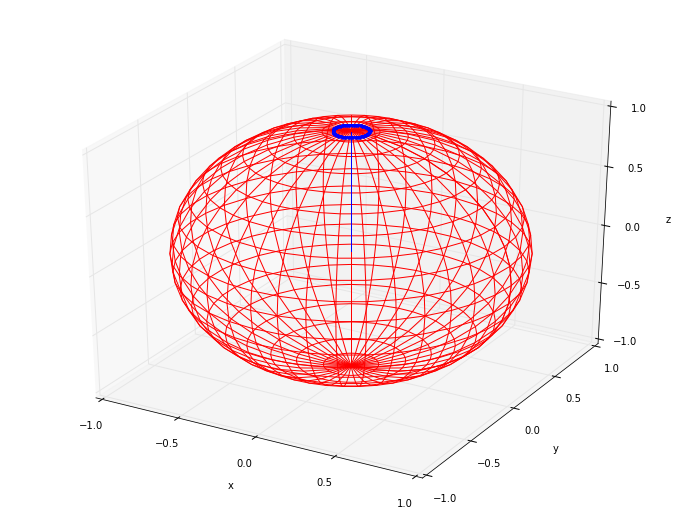

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def test(tobs=0.5,tjet=0.3):

    # Plot a sphere in the observer spherical coordinates
    #----------------------------------------------------
    fig = plt.figure(figsize=(12,9))
    ax = plt.axes(projection='3d')    
    
    u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:21j]
    x=np.cos(u)*np.sin(v)
    y=np.sin(u)*np.sin(v)
    z=np.cos(v)
    ax.plot_wireframe(x, y, z, color="r")
    
    r = np.arange(0,1,.01)
    x=r*np.sin(tobs)*np.cos(0)
    y=r*np.sin(tobs)*np.sin(0)
    z=r*np.cos(tobs)
    ax.plot(x,y,z,color='b')
    

    # Circle in the spherical coordinates associated to the jet
    #----------------------------------------------------------
    
    # Number of points
    n = 100

    # Azimuthal angle Phi0
    pmin = 0
    pmax = 2*np.pi
    p0 = pmin + (pmax-pmin)*np.arange(n)/(n-1.)
    
    # Polar angle Theta0
    t0 = tjet*np.ones(n)
    

    # Circle in the spherical coordinates associates to the observer
    #---------------------------------------------------------------
    
    # Polar angle Theta
    st = np.cos(t0)*np.cos(tobs) + np.sin(t0)*np.sin(tobs)*np.cos(p0)
    t = np.arccos(st)
    
    # Azimuthal angle Theta
    sin_p = np.sin(t0)*np.sin(p0)/np.sin(t)
    p = np.arcsin(sin_p) 
    cos_p = ( -np.cos(t0)*np.sin(tobs) + np.sin(t0)*np.cos(tobs)*np.cos(p0))/np.sin(t)
    p[cos_p>0] = np.pi-p[cos_p>0]
    
    
    # Plot the circle
    #-----------------
    
    x = np.sin(t)*np.cos(p)
    y = np.sin(t)*np.sin(p)
    z = np.cos(t)
    ax.plot(x, y, z,marker='.')
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    ax.set_zlim(-1,1)    
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_zlabel('z')
    plt.show()
   
test()
test(0,0.1)

89.8607183538 -0.5964018994


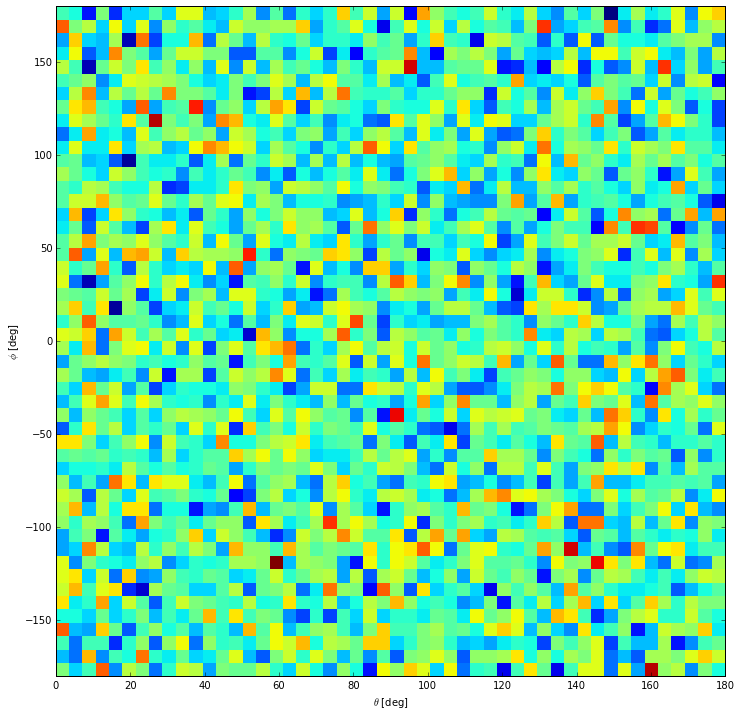

In [3]:
%matplotlib inline
import matplotlib.cm as colormap
from numpy                import cos, sin, arccos, arctan, sqrt, random, pi, ones
from numpy                import rot90, flipud, histogram2d, ma, log10, mean
from matplotlib.pyplot    import figure, show
from mpl_toolkits.mplot3d import Axes3D

degre = pi/180

def jet(theta,phi,tobs=0.5,tjet=0.3): 
   tobs *= degre
   tjet *= degre
   theta0 = arccos( cos(theta)*cos(tobs)-sin(theta)*sin(tobs)*cos(phi) )
   phi0 = arctan( (sin(theta)*sin(phi))/(cos(theta)*sin(tobs)+sin(theta)*cos(tobs)*cos(phi)) )
   return theta0, phi0, 1/(2*pi*sin(theta0))*1/(2*pi*sin(tjet))

def spherical_coord(x,y,z):
   r = sqrt(x**2+y**2+z**2)
   theta = arccos(z/r)
   phi = arctan(y/x)
   return r, theta, phi

def cartesian_coord(r,theta,phi):
   x = r*sin(theta)*cos(phi)
   y = r*sin(theta)*sin(phi)
   z = r*cos(theta)
   return x,y,z
   
N = 100000
r = ones(N)
theta0 = random.rand(N)*pi
phi0 = (2*random.rand(N)-1)*pi

print mean(theta0)/degre, mean(phi0)/degre

tobs = 0
tjet = 0.5

theta, phi, weight = jet(theta0,phi0,tobs,tjet)
#x,y,z = cartesian_coord(r,theta,phi)

#ax1 = figure(figsize=(12,12)).add_subplot(111,projection='3d') 
#ax1.scatter(x, y, z,marker='*')
#ax1.set_xlim([-1,1])
#ax1.set_ylim([-1,1])
#ax1.set_zlim(-1,1)    
#ax1.set_xlabel('x')
#ax1.set_ylabel('y')
#ax1.set_zlabel('z')

ax2 = figure(figsize=(12,12)).add_subplot(111) 
H, xedges, yedges = histogram2d(theta0/degre,phi0/degre,bins=50)#,weights=weight)
H = flipud(rot90(ma.masked_where(H==0,H)))
im = ax2.pcolormesh(xedges,yedges,H,cmap=colormap.jet)
ax2.set_xlim([0,180])
ax2.set_ylim([-180,180])  
ax2.set_xlabel('$\\theta$ [deg]')
ax2.set_ylabel('$\\phi$ [deg]')
ax2.legend(loc='best')

show()   